# Constructing a Neural Network

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Activities/CVPR/Dataset.csv')
dataset.sample(15)

,Coffee,Milk,Type
214,2,51,Latte
61,3,7,Cappuccino
27,6,62,Latte
108,2,41,Cappuccino
181,7,34,Latte
222,10,70,Espresso
8,6,53,Latte
265,7,21,Latte
228,5,50,Latte
172,7,7,Cappuccino


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
y[:15]

array(['Espresso', 'Cappuccino', 'Latte', 'Latte', 'Latte', 'Espresso',
       'Latte', 'Cappuccino', 'Latte', 'Cappuccino', 'Cappuccino',
       'Cappuccino', 'Latte', 'Latte', 'Espresso'], dtype=object)

In [6]:
labels, y_encoded = np.unique(y, return_inverse=True)

print("Unique Labels:", labels)
print("First 10 Encoded Labels:", y_encoded[:10])

Unique Labels: ['Cappuccino' 'Espresso' 'Latte']
First 10 Encoded Labels: [1 0 2 2 2 1 2 0 2 0]


In [7]:
y_one_hot = np.eye(len(labels))[y_encoded]

print("Shape of One-Hot Encoded Labels:", y_one_hot.shape)
print("Sample One-Hot Encoded Labels (from index 10 onward):\n", y_one_hot[10:])


Shape of One-Hot Encoded Labels: (299, 3)
Sample One-Hot Encoded Labels (from index 10 onward):
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1

## Plotting

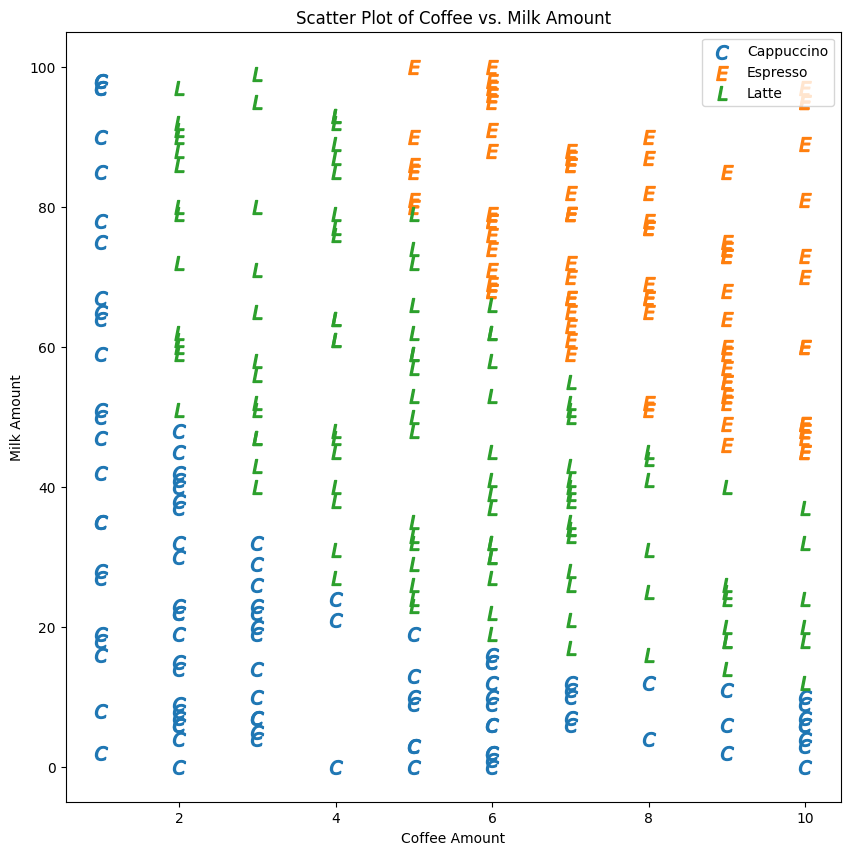

In [8]:
markers = ['$C$', '$E$', '$L$']
plt.figure(figsize=(10, 10))

for label, marker in zip(np.unique(y_encoded), markers):
    plt.scatter(X[y_encoded == label, 0], X[y_encoded == label, 1], label=labels[label], marker=marker, s=100)

plt.xlabel("Coffee Amount")
plt.ylabel("Milk Amount")
plt.legend()
plt.title("Scatter Plot of Coffee vs. Milk Amount")
plt.show()


## Shuffling

In [9]:
indices = np.random.choice(len(X), len(X), replace=False)

split_index = int(len(X) * 0.8)

X_train = X[indices[:split_index]]
X_test = X[indices[split_index:]]
y_train = y_one_hot[indices[:split_index]]
y_test = y_one_hot[indices[split_index:]]

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (239, 2)
X_test shape: (60, 2)
y_train shape: (239, 3)
y_test shape: (60, 3)


## Normalizing the Train Data

In [10]:
def normalize_features_min_max(X):
    feature_means = np.mean(X, axis=0)
    feature_stds = np.std(X, axis=0)

    X_normalized = (X - feature_means) / feature_stds

    return X_normalized

In [11]:
X_train_normalized = normalize_features_min_max(X_train)
X_test_normalized = normalize_features_min_max(X_test)

print(X_train_normalized[:10])
print()
print(X_test_normalized[:10])

[[-1.27439697 -0.84715707]
 [-0.90431085 -0.01636669]
 [-1.27439697 -0.98562213]
 [ 1.31620586  0.7105749 ]
 [ 0.20594751  0.7105749 ]
 [ 0.57603363  1.09135382]
 [ 0.57603363  0.67595863]
 [-0.90431085 -0.74330827]
 [ 0.20594751  1.05673755]
 [-0.90431085  1.78367914]]

[[-0.89490645 -1.13991864]
 [ 1.06952234  0.89196051]
 [ 1.39692714 -0.79553234]
 [-1.54971604  0.09987203]
 [-0.89490645  0.13431066]
 [-1.54971604  0.13431066]
 [-0.56750165  1.30522406]
 [ 0.08730795  0.99527639]
 [-1.22231125 -1.41542767]
 [-1.54971604  0.61645147]]


## Class: `NeuralNetwork`

In [12]:
class NeuralNetwork:
    def __init__(self):
        # Defines the number of neurons in each layer
        inputLayerNeurons = 2
        hiddenLayer1Neurons = 4
        hiddenLayer2Neurons = 4
        hiddenLayer3Neurons = 4
        outputLayerNeurons = 3

        # Learning rate
        self.learning_rate = 0.0001

        # Weights for the layers
        self.W_H1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_H3 = np.random.randn(hiddenLayer2Neurons, hiddenLayer3Neurons)
        self.W_O = np.random.randn(hiddenLayer3Neurons, outputLayerNeurons)

        # Biases for the layers
        self.b_H1 = np.random.randn(1, hiddenLayer1Neurons)
        self.b_H2 = np.random.randn(1, hiddenLayer2Neurons)
        self.b_H3 = np.random.randn(1, hiddenLayer3Neurons)
        self.b_O = np.random.randn(1, outputLayerNeurons)

    def relu(self, x, der=False):
        if der:
            return np.where(x > 0, 1, 0)
        else:
            return np.maximum(0, x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        # Layer 1
        self.hidden_input1 = np.dot(X, self.W_H1) + self.b_H1
        self.hidden_output1 = self.relu(self.hidden_input1)

        # Layer 2
        self.hidden_input2 = np.dot(self.hidden_output1, self.W_H2) + self.b_H2
        self.hidden_output2 = self.relu(self.hidden_input2)

        # Layer 3
        self.hidden_input3 = np.dot(self.hidden_output2, self.W_H3) + self.b_H3
        self.hidden_output3 = self.relu(self.hidden_input3)

        # Output layer
        self.output_input = np.dot(self.hidden_output3, self.W_O) + self.b_O
        pred = self.softmax(self.output_input)

        return pred

    def backPropagation(self, X, Y, pred):
        # Output layer error and delta
        output_error = Y - pred
        output_delta = output_error

        # Hidden layer 3 error and delta
        hidden_error3 = output_delta.dot(self.W_O.T)
        hidden_delta3 = hidden_error3 * self.relu(self.hidden_input3, der=True)

        # Hidden layer 2 error and delta
        hidden_error2 = hidden_delta3.dot(self.W_H3.T)
        hidden_delta2 = hidden_error2 * self.relu(self.hidden_input2, der=True)

        # Hidden layer 1 error and delta
        hidden_error1 = hidden_delta2.dot(self.W_H2.T)
        hidden_delta1 = hidden_error1 * self.relu(self.hidden_input1, der=True)

        # Updates weights and biases
        self.W_O += self.learning_rate * self.hidden_output3.T.dot(output_delta)
        self.b_O += self.learning_rate * np.sum(output_delta, axis=0, keepdims=True)

        self.W_H3 += self.learning_rate * self.hidden_output2.T.dot(hidden_delta3)
        self.b_H3 += self.learning_rate * np.sum(hidden_delta3, axis=0, keepdims=True)

        self.W_H2 += self.learning_rate * self.hidden_output1.T.dot(hidden_delta2)
        self.b_H2 += self.learning_rate * np.sum(hidden_delta2, axis=0, keepdims=True)

        self.W_H1 += self.learning_rate * X.T.dot(hidden_delta1)
        self.b_H1 += self.learning_rate * np.sum(hidden_delta1, axis=0, keepdims=True)

    def train(self, X, Y):
        # Forward pass
        output = self.feedForward(X)

        # Backward pass
        self.backPropagation(X, Y, output)

In [13]:
def categorical_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-9, 1 - 1e-9)  # Prevent log(0)
    return -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]

In [14]:
def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

## Training

In [15]:
NN = NeuralNetwork()

NN.W_H1 = np.random.randn(X_train_normalized.shape[1], NN.W_H1.shape[1])

epochs = 10000
err = []
acc = []

for epoch in range(epochs):
    NN.train(X_train_normalized, y_train)

    y_pred = NN.feedForward(X_train_normalized)

    loss = categorical_cross_entropy(y_train, y_pred)
    accuracy_value = accuracy(y_train, y_pred)

    err.append(loss)
    acc.append(accuracy_value)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs} - Loss: {loss:.4f}, Accuracy: {accuracy_value:.4f}")


Epoch 0/10000 - Loss: 2.0774, Accuracy: 0.3975
Epoch 100/10000 - Loss: 1.1140, Accuracy: 0.3933
Epoch 200/10000 - Loss: 1.0958, Accuracy: 0.3975
Epoch 300/10000 - Loss: 1.0892, Accuracy: 0.3975
Epoch 400/10000 - Loss: 1.0859, Accuracy: 0.3975
Epoch 500/10000 - Loss: 1.0825, Accuracy: 0.3975
Epoch 600/10000 - Loss: 1.0733, Accuracy: 0.3975
Epoch 700/10000 - Loss: 1.0317, Accuracy: 0.3975
Epoch 800/10000 - Loss: 0.8974, Accuracy: 0.7531
Epoch 900/10000 - Loss: 0.7509, Accuracy: 0.7490
Epoch 1000/10000 - Loss: 0.5289, Accuracy: 0.8410
Epoch 1100/10000 - Loss: 0.4189, Accuracy: 0.8828
Epoch 1200/10000 - Loss: 0.3588, Accuracy: 0.8870
Epoch 1300/10000 - Loss: 0.3181, Accuracy: 0.8954
Epoch 1400/10000 - Loss: 0.2871, Accuracy: 0.8996
Epoch 1500/10000 - Loss: 0.2686, Accuracy: 0.9079
Epoch 1600/10000 - Loss: 0.2451, Accuracy: 0.9163
Epoch 1700/10000 - Loss: 0.2152, Accuracy: 0.9331
Epoch 1800/10000 - Loss: 0.1932, Accuracy: 0.9456
Epoch 1900/10000 - Loss: 0.1727, Accuracy: 0.9456
Epoch 2000/1

## Training Loss and Accuracy

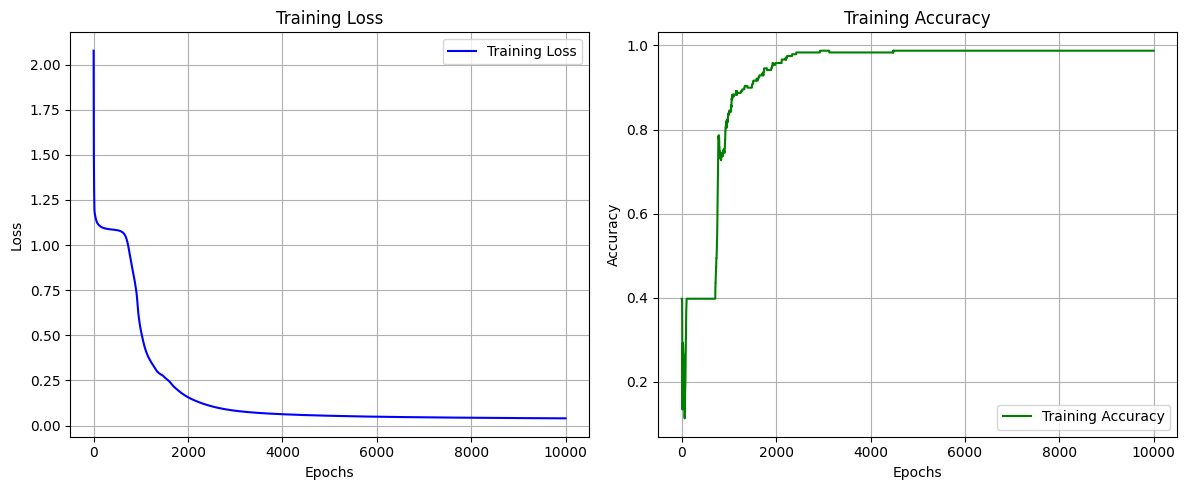

In [16]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(len(err)), err, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(acc)), acc, label='Training Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

## Evaluating the Model on the Test Set

In [17]:
y_test_pred = NN.feedForward(X_test_normalized)

test_loss = categorical_cross_entropy(y_test, y_test_pred)

test_accuracy = accuracy(y_test, y_test_pred)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {100*test_accuracy:.2f}%")


Test Loss: 0.0790
Test Accuracy: 96.67%
